In [2]:
import pandas as pd
import numpy as np
import os
import json

base_dir = "/home/arjav.singh/DeepIO/Production Data/SIDM/csvs"

In [8]:
num_csv = 0
num_dirs = 0

for dirs in os.listdir(base_dir):
    dir_path = os.path.join(base_dir, dirs)
    
    if not os.path.isdir(dir_path):
        continue
    
    num_dirs += 1
    
    for files in os.listdir(dir_path):
        if not files.endswith(".csv"):
            continue
        
        num_csv += 1
        
print(f"Total directories: {num_dirs}")
print(f"Total CSVs: {num_csv}")
    
    
    

Total directories: 26
Total CSVs: 2219


In [ ]:
c = 0
for dirs in os.listdir(base_dir):
    json_path = os.path.join(base_dir, dirs, "trajectory_report_data", "flight_data.json")
    
    if not os.path.isfile(json_path):
        print(f"Missing: {json_path}")
        continue
    
    with open(json_path, "r") as f:
        data = json.load(f)
    
    for date_timedf in data:
        duration = df.get("flight_duration_min", 0)
        if duration > 5:
            c += 1

print(c)


Missing: /home/arjav.singh/DeepIO/Production Data/SIDM/csvs/SW21-61-62-62/trajectory_report_data/flight_data.json
Missing: /home/arjav.singh/DeepIO/Production Data/SIDM/csvs/flight_quality_overall_pie.png/trajectory_report_data/flight_data.json
Missing: /home/arjav.singh/DeepIO/Production Data/SIDM/csvs/flight_durations_alldistance.png/trajectory_report_data/flight_data.json
1248


No matching entry found for 02 May 2022 06_28_17
No matching entry found for 22 June 2022 05_52_57
No matching entry found for 06 June 2022 05_29_12
/home/arjav.singh/DeepIO/Production Data/SIDM/csvs/SW36-106-107-108/trajectory_report_data/images/good_trajectories 15 August 2022 05_16_24.png
No matching entry found for 21 June 2022 05_36_57
No matching entry found for 28 May 2022 04_38_01
No matching entry found for 08 May 2022 04_50_23
No matching entry found for 25 June 2022 06_21_09
No matching entry found for 26 June 2022 06_23_29
No matching entry found for 25 June 2022 05_55_40
No matching entry found for 11 August 2022 06_10_36
No matching entry found for 11 April 2022 06_17_41
/home/arjav.singh/DeepIO/Production Data/SIDM/csvs/SW04-10-11-12/trajectory_report_data/images/good_trajectories 12 August 2022 08_04_10.png
/home/arjav.singh/DeepIO/Production Data/SIDM/csvs/SW04-10-11-12/trajectory_report_data/images/good_trajectories 12 August 2022 11_18_05.png
/home/arjav.singh/DeepIO

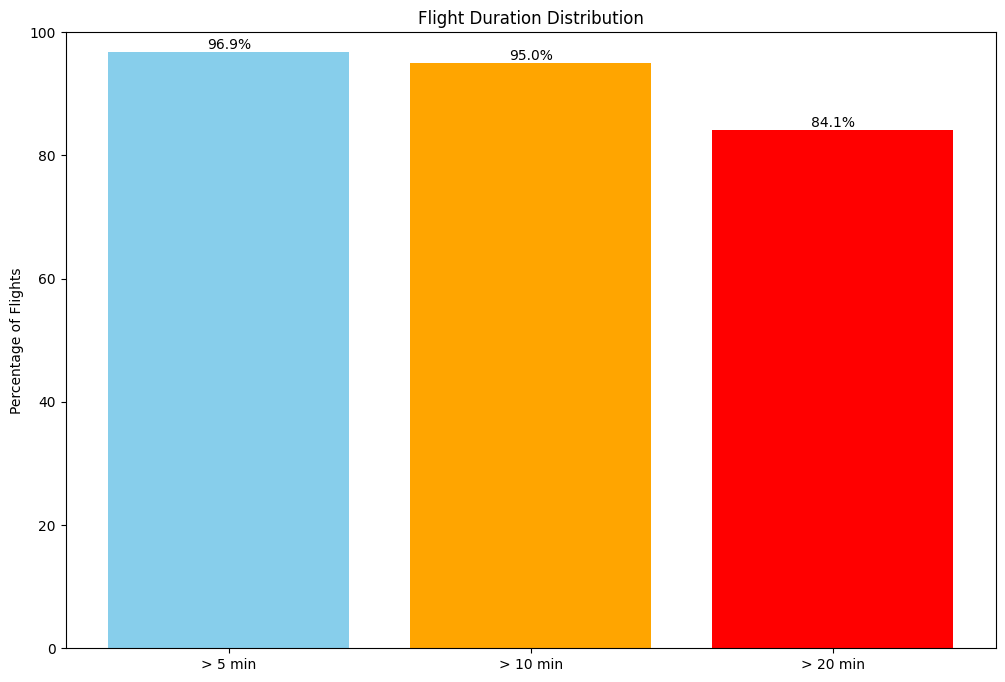

In [ ]:
import os
import json
import matplotlib.pyplot as plt

# Counters
count_5 = 0
count_10 = 0
count_20 = 0
total_flights = 0

for dirs in os.listdir(base_dir):
    
    json_path = os.path.join(base_dir, dirs, "trajectory_report_data", "flight_data.json")
    
    if not os.path.isfile(json_path):
        print(f"Missing: {json_path}")
        continue
    
    with open(json_path, "r") as f:
        date_timedf = pd.DataFrame(json.load(f))
    
    
    good_trajectory = os.path.join(base_dir, dirs, "trajectory_report_data", "images", "good_trajectories")
    for img_file in os.listdir(good_trajectory):
        if img_file.endswith(".png"):
            match_index = df.index[df["file_name"] == img_file[:-4]].tolist()
            if not match_index:
                print(f"No matching entry found for {img_file[:-4]}")
                continue
            
            duration = df["flight_duration_min"].iloc[match_index[0]]
            total_flights += 1
            if duration < 5:
                print(good_trajectory, img_file)
            if duration > 5:
                count_5 += 1
            if duration > 10:
                count_10 += 1
            if duration > 20:
                count_20 += 1
            
        

# Calculate percentages
percentages = [
    (count_5 / total_flights) * 100,
    (count_10 / total_flights) * 100,
    (count_20 / total_flights) * 100
]

labels = ["> 5 min", "> 10 min", "> 20 min"]

# Plot
plt.figure(figsize=(12, 8))
bars = plt.bar(labels, percentages, color=["skyblue", "orange", "red"])
plt.ylabel("Percentage of Flights")
plt.title("Flight Duration Distribution")

# Annotate bars
for bar, pct in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f"{pct:.1f}%", ha='center', va='bottom')

plt.ylim(0, 100)
plt.show()


---
---

# Get the errorneous GPS Time Csv files

In [ ]:
import os
import shutil

base_dir = "/home/arjav.singh/DeepIO/Production Data/SIDM/csvs"
file_names = []

for dir in os.listdir(base_dir):
    dir_path = os.path.join(base_dir, dir)
    text_file_path = os.path.join(dir_path, "trajectory_report_data", "bft_data_generation_errors.txt")
    
    if not os.path.exists(text_file_path):
        continue
    
    with open(text_file_path, "r") as f:
        text = f.read().split("\n\n")
        
    if not text:
        continue
    
    for errors in text:
        path = errors.split(":")[0]
        file_name = "/".join(path.split("/")[-2:])
        file_names.append(file_name)
        
with open(os.path.join(base_dir, "gps_time_error.txt"), "w") as f:
    for name in file_names:
        f.write(f"{name}\n\n")
        
destination_dir = os.path.join(base_dir, "gps_time_error_files")
os.makedirs(destination_dir, exist_ok=True)

for name in file_names:
    if name == "\n":
        continue
    source_path = os.path.join(base_dir, name)
    destination_path = os.path.join(destination_dir, name)
    shutil.copy2(source_path, destination_dir)

## Visualization

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

path = "/home/arjav.singh/DeepIO/Production Data/SIDM/gps_time_error_files"
plots_dir = os.path.join(path, "plots")
os.makedirs(plots_dir, exist_ok=True)  # Create plots folder if not exists

for files in os.listdir(path):
    file_path = os.path.join(path, files)

    # Skip directories and non-CSV files
    if not os.path.isfile(file_path) or not files.endswith(".csv"):
        continue

    data = pd.read_csv(file_path, low_memory=False)

    plt.plot(data.index.tolist(), data['GPS Time'].tolist())
    plt.xlabel("Index")
    plt.ylabel("GPS Time")
    plt.title(f"{files[:-4]}")
    plt.savefig(os.path.join(plots_dir, f"{files[:-4]}.png"))
    plt.clf()


<Figure size 640x480 with 0 Axes>

---
---

# Converting the GPS Date and GPS Time into DateTime format

In [138]:
import pandas as pd
data = pd.read_csv("/home/arjav.singh/DeepIO/Production Data/SIDM/csvs/SW35-103-04-105/04 May 2022 10_09_04.csv", low_memory=False, on_bad_lines='skip')
data["Mode"].unique()

array(['OFF', 'OFF/0/V', 'STARTUP/99/V', 'TAKEOFF/10/V', 'TAKEOFF/11/V',
       'TAKEOFF/12/T', 'TAKEOFF/13/T', 'TAKEOFF/14/T', 'HOLD/30/F',
       'LAND/21/F', 'LAND/22/F', 'LAND/25/V'], dtype=object)

In [139]:
date_time = data[["GPS Date", "GPS Time"]].copy()

In [140]:
# Zero-pad date (ddmmyy → 6 digits) and time (HHMMSS → 6 digits)
date_time["date_str"] = date_time["GPS Date"].astype(str).str.zfill(6)
date_time["time_str"] = date_time["GPS Time"].astype(str).str.zfill(6)

# Combine into datetime string
date_time["datetime_str"] = date_time["date_str"] + date_time["time_str"]

# Convert to datetime (errors='coerce' turns invalid dates into NaT)
date_time["datetime"] = pd.to_datetime(
    date_time["datetime_str"], 
    format="%d%m%y%H%M%S",
    errors="coerce"
)

# Convert to Unix timestamp (seconds since epoch)
date_time["timestamp_seconds"] = date_time["datetime"].astype("int64") // 10**9


In [142]:
date_time.head(10)

,GPS Date,GPS Time,date_str,time_str,datetime_str,datetime,timestamp_seconds
0,0,0,000000,000000,000000000000,NaT,-9223372037
1,40522,43933,040522,043933,040522043933,2022-05-04 04:39:33,1651639173
2,40522,43933,040522,043933,040522043933,2022-05-04 04:39:33,1651639173
3,40522,43933,040522,043933,040522043933,2022-05-04 04:39:33,1651639173
4,40522,43933,040522,043933,040522043933,2022-05-04 04:39:33,1651639173
5,40522,43933,040522,043933,040522043933,2022-05-04 04:39:33,1651639173
6,40522,43933,040522,043933,040522043933,2022-05-04 04:39:33,1651639173
7,40522,43933,040522,043933,040522043933,2022-05-04 04:39:33,1651639173
8,40522,43933,040522,043933,040522043933,2022-05-04 04:39:33,1651639173
9,40522,43934,040522,043934,040522043934,2022-05-04 04:39:34,1651639174


---
---

# CSV Analysis for missing data

In [1]:
import pymap3d as pm
import pandas as pd

def gps_to_ned(df):
    valid_mask = (df["GPS Lat"] != 0) & (df["GPS Lon"] != 0) & (df["Altitude"] != 0)
    valid_rows = df[valid_mask]

    if valid_rows.empty:
        return pd.DataFrame(columns=["x", "y", "z"], index=df.index)
    
    df = df[valid_rows.index[0]: ].reset_index()

    # Reference point = first valid row
    lat_ref, lon_ref, alt_ref = valid_rows.iloc[0][["GPS Lat", "GPS Lon", "Altitude"]]

    ned_coords = [
        pm.geodetic2ned(lat, lon, alt, lat_ref, lon_ref, alt_ref)
        for lat, lon, alt in valid_rows[["GPS Lat", "GPS Lon", "Altitude"]].to_numpy()
    ]

    # Convert (n, e, d) to (x, y, z) with z = up
    ned_df = pd.DataFrame([(n, e, -d) for n, e, d in ned_coords], 
                          columns=["x", "y", "z"], 
                          index=valid_rows.index)

    # Reindex to original df (invalid rows get NaN)
    return ned_df.reindex(df.index)


In [2]:
MODE_MAPPING = {
    "COLLISION": 0,
    "FS BATT": 1,
    "FS COMM": 2,
    "HOLD/30/F": 3,
    "HOME": 4,
    "HOME/40/F": 5,
    "HOME/40/V": 6,
    "HOVER": 7,
    "LAND": 8,
    "LAND/21/F": 9,
    "LAND/22/F": 10,
    "LAND/25/V": 11,
    "MANUAL E": 12,
    "OFF": 13,
    "OFF/0/V": 14,
    "RPV": 15,
    "STARTUP": 16,
    "STARTUP/99/V": 17,
    "TAKEOFF": 18,
    "TAKEOFF/10/V": 19,
    "TAKEOFF/11/V": 20,
    "TAKEOFF/12/T": 21,
    "TAKEOFF/12/V": 22,
    "TAKEOFF/13/T": 23,
}

In [12]:
import os
def get_flight_csv_paths(base_dir):
    flight_csv_paths = []
    for dirs in os.listdir(base_dir):
        dir_path = os.path.join(base_dir, dirs)
        if not os.path.isdir(dir_path):
            continue
        good_image_dir = os.path.join(
            dir_path, "trajectory_report_data", "images", "good_trajectories"
        )
        if not os.path.exists(good_image_dir):
            continue

        for files in os.listdir(good_image_dir):
            if files.endswith(".png"):
                flight_csv_path = os.path.join(dir_path, files.replace(".png", ".csv"))
                flight_csv_paths.append(flight_csv_path)

    return flight_csv_paths

In [ ]:

import matplotlib.pyplot as plt

base_dir = "/home/arjav.singh/DeepIO/Production Data/SIDM/csvs"
flight_csv_paths = get_flight_csv_paths(base_dir)
count = 0
total = 0
good_flights = []
for csv_file in flight_csv_paths:
    data = pd.read_csv(csv_file, low_memory=False)

    df_ned = gps_to_ned(data)
    df_ned[['Mode', 'GPS Time', 'GPS Date', 'GPS Lat', 'GPS Lon', 'Altitude']] = data[['Mode', 'GPS Time', 'GPS Date', 'GPS Lat', 'GPS Lon', 'Altitude']]

    if not df_ned[(df_ned['x'].diff().fillna(0).abs() > 50) | (df_ned['y'].diff().fillna(0).abs() > 50) | (df_ned['z'].diff().fillna(0).abs() > 50)].empty:
        count += 1
    total += 1
        
print(count)
print(total)


# Flights with no sudden jump
no_jump_count = total - count

# Custom autopct function to show count + percentage
def autopct_format(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals)))
    return f"{absolute} ({pct:.1f}%)"

values = [no_jump_count, count]

plt.figure(figsize=(6, 6))
plt.pie(values,
        labels=["No Sudden Jump", "Sudden Jump"],
        autopct=lambda pct: autopct_format(pct, values),
        startangle=90)
plt.title("Flights with/without Sudden Jump (>50 units)")
plt.show()


In [172]:
import matplotlib.pyplot as plt

def plot_ned_vs_gps_dual(df, ned_col, gps_col):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plot NED x (left y-axis)
    ax1.plot(df.index, df[ned_col], color="royalblue", linewidth=2, label=f"NED {ned_col} (m)")
    ax1.set_xlabel("Index", fontsize=12)
    ax1.set_ylabel(f"NED {ned_col} (meters)", color="royalblue", fontsize=12)
    ax1.tick_params(axis="y", labelcolor="royalblue")

    # Plot GPS Lat (right y-axis)
    ax2 = ax1.twinx()
    
    if gps_col == "Altitude":
        ax2.plot(df.index, df[gps_col], color="darkorange", linewidth=2, linestyle="--", 
             label="Altitude (meters)")
        ax2.set_ylabel("Altitude (meters))", color="darkorange", fontsize=12)
    else:   
        ax2.plot(df.index, df[gps_col], color="darkorange", linewidth=2, linestyle="--", 
                label=f"{gps_col} (°)")
        ax2.set_ylabel("GPS (degrees)", color="darkorange", fontsize=12)
    ax2.tick_params(axis="y", labelcolor="darkorange")

    # Title
    plt.title("NED vs Raw Values", fontsize=14, fontweight="bold")

    # Combine legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc="best", fontsize=11)

    fig.tight_layout()
    plt.show()


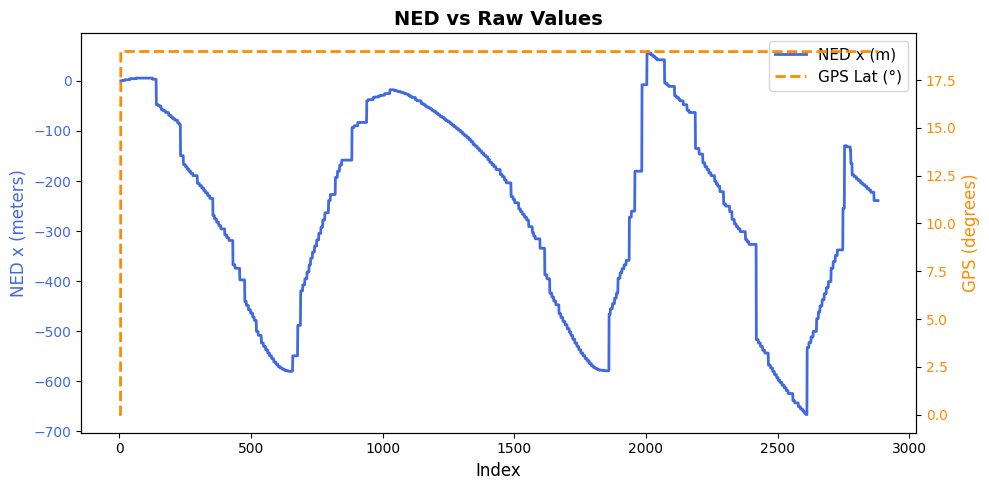

In [173]:
plot_ned_vs_gps_dual(df_ned, 'x', 'GPS Lat')

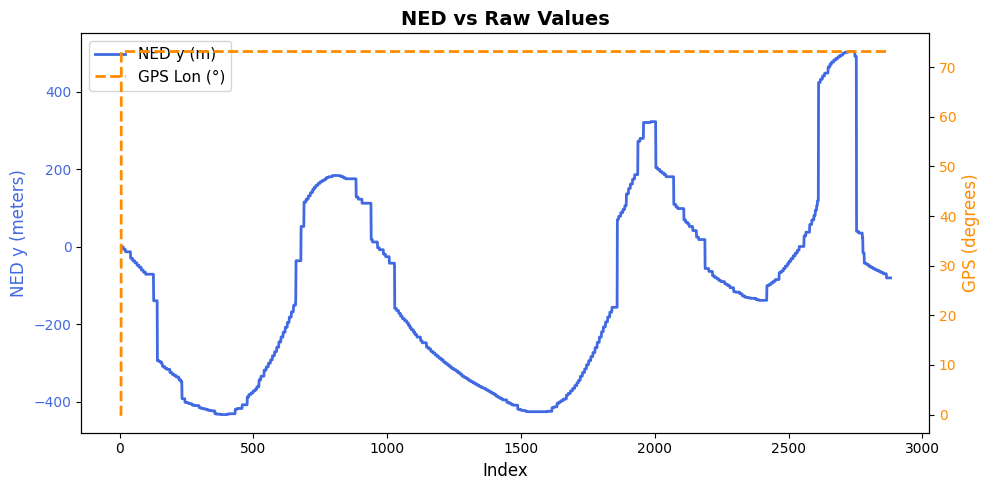

In [174]:
plot_ned_vs_gps_dual(df_ned, 'y', 'GPS Lon')

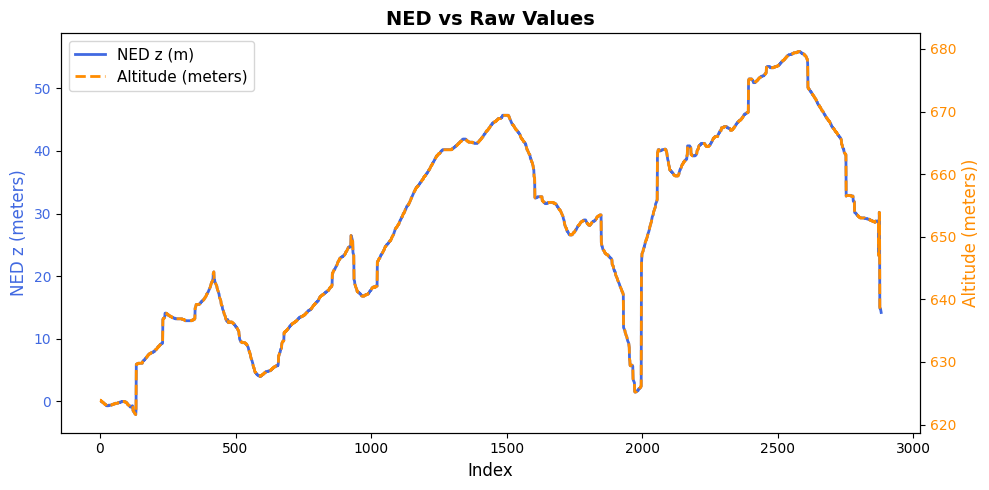

In [175]:
plot_ned_vs_gps_dual(df_ned, 'z', 'Altitude')

       GPS Lat   GPS Lon  Altitude
2     32.80104  79.00555     165.7
3     32.80104  79.00555     165.7
4     32.80104  79.00555     165.7
5     32.80104  79.00555     165.7
6     32.80104  79.00555     165.7
...        ...       ...       ...
6466  32.80257  79.00352       2.6
6467  32.80257  79.00352       2.6
6468  32.80257  79.00352       2.6
6469  32.80257  79.00352       2.6
6470  32.80257  79.00352       2.6

[6469 rows x 3 columns]



32.80104 79.00555 165.7



               x           y           z
0       0.000000    0.000000    0.000000
1       0.000000    0.000000    0.000000
2       0.000000    0.000000    0.000000
3       0.000000    0.000000    0.000000
4       0.000000    0.000000    0.000000
...          ...         ...         ...
6464  169.680327 -190.131492 -163.105097
6465  169.680327 -190.131492 -163.105097
6466  169.680327 -190.131492 -163.105097
6467  169.680327 -190.131492 -163.105097
6468  169.680327 -190.131492 -163.105097

[6469 rows x 3 columns]





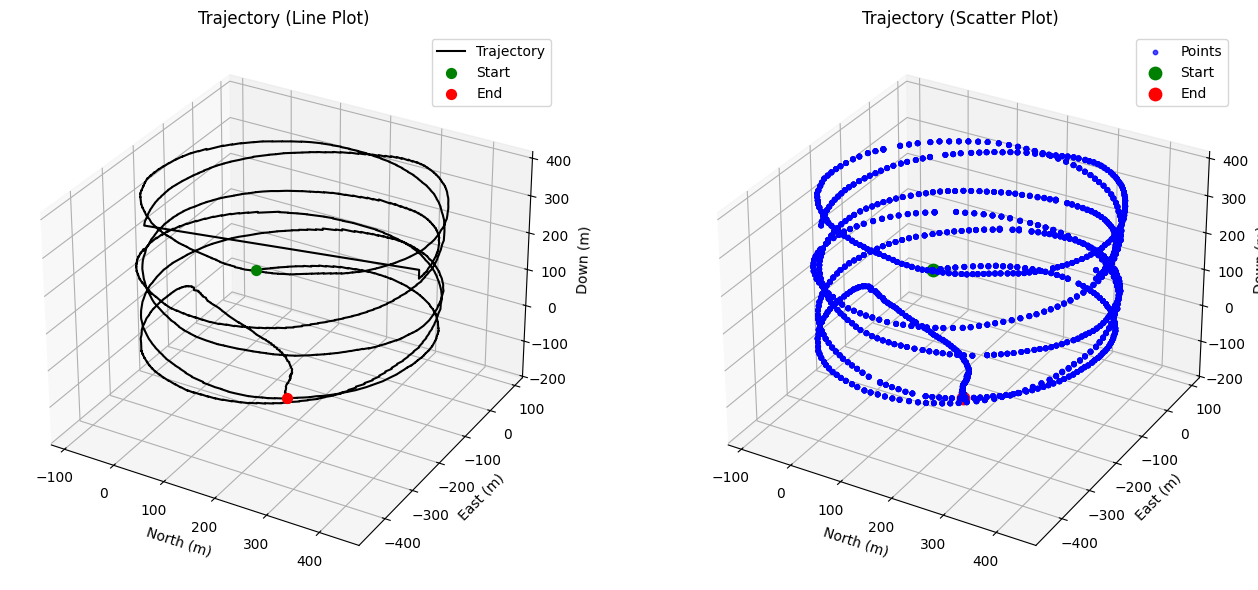

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# csv_file = "/home/arjav.singh/DeepIO/Production Data/SIDM/csvs/SW13-37-38-39/12 May 2022 10_16_02.csv"
csv_file = "/home/arjav.singh/DeepIO/Production Data/SIDM/csvs/SW02-04-05-06/03 July 2022 11_13_35.csv"
df = pd.read_csv(csv_file, low_memory=False)

valid_rows = df[
    (df["GPS Lat"] != 0) & (df["GPS Lon"] != 0) & (df["Altitude"] != 0)
]
print(valid_rows[["GPS Lat", "GPS Lon", "Altitude"]])
print("\n\n")

df = df[valid_rows.index[0] :].reset_index()

lat_ref, lon_ref, alt_ref = df[["GPS Lat", "GPS Lon", "Altitude"]].iloc[0]
print(lat_ref, lon_ref, alt_ref)
print("\n\n")

ned_coords = [
    pm.geodetic2ned(
        row["GPS Lat"],
        row["GPS Lon"],
        row["Altitude"],
        lat_ref,
        lon_ref,
        alt_ref,
    )
    for _, row in df.iterrows()
]

df_ned = pd.DataFrame(
    [(n, e, -d) for n, e, d in ned_coords], columns=["x", "y", "z"]
)
print(df_ned)
print("\n\n")

fig = plt.figure(figsize=(14, 6))

# Extract start and end points
start_point = (df_ned["x"].iloc[0], df_ned["y"].iloc[0], df_ned["z"].iloc[0])
end_point = (df_ned["x"].iloc[-1], df_ned["y"].iloc[-1], df_ned["z"].iloc[-1])

# 1️⃣ Line plot
ax1 = fig.add_subplot(121, projection="3d")
ax1.plot(df_ned["x"], df_ned["y"], df_ned["z"], color="black", lw=1.5, label="Trajectory")
ax1.scatter(*start_point, color="green", s=50, label="Start", zorder=5)
ax1.scatter(*end_point, color="red", s=50, label="End", zorder=5)
ax1.set_xlabel("North (m)")
ax1.set_ylabel("East (m)")
ax1.set_zlabel("Down (m)")
ax1.set_title("Trajectory (Line Plot)")
ax1.legend()
ax1.grid(True, linestyle="--", alpha=0.5)

# 2️⃣ Scatter plot
ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(
    df_ned["x"], df_ned["y"], df_ned["z"], c="blue", s=10, label="Points", alpha=0.7
)
ax2.scatter(*start_point, color="green", s=80, label="Start", zorder=5)
ax2.scatter(*end_point, color="red", s=80, label="End", zorder=5)
ax2.set_xlabel("North (m)")
ax2.set_ylabel("East (m)")
ax2.set_zlabel("Down (m)")
ax2.set_title("Trajectory (Scatter Plot)")
ax2.legend()
ax2.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()



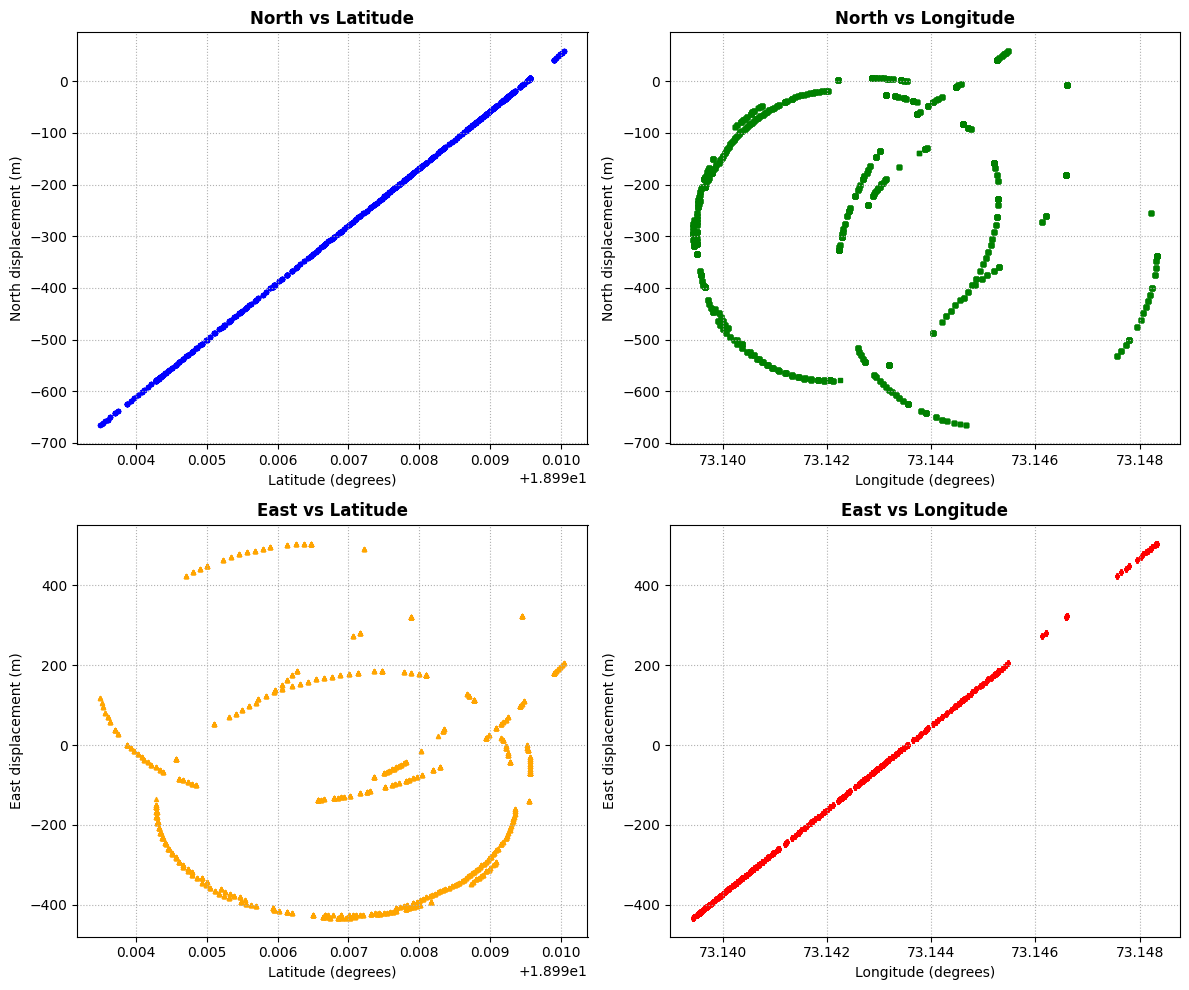

In [130]:
def plot_ned_displacements(data):
    # Keep only valid rows
    valid_rows = data[
        (data["GPS Lat"] != 0) & (data["GPS Lon"] != 0) & (data["Altitude"] != 0)
    ]

    # Reference point
    lat_ref, lon_ref, alt_ref = valid_rows[["GPS Lat", "GPS Lon", "Altitude"]].iloc[0]

    north_displacements = []
    east_displacements = []

    # Compute displacements
    for _, row in valid_rows.iterrows():
        n, e, d = pm.geodetic2ned(row['GPS Lat'], lon_ref, alt_ref,
                                  lat_ref, lon_ref, alt_ref)
        north_displacements.append(n)
        
    for _, row in valid_rows.iterrows():
        n, e, d = pm.geodetic2ned(lat_ref, row['GPS Lon'], alt_ref,
                                  lat_ref, lon_ref, alt_ref)
        east_displacements.append(e)


    # Plot results
    plt.figure(figsize=(12,10))

    # N vs Lat
    plt.subplot(2,2,1)
    plt.scatter(valid_rows['GPS Lat'], north_displacements, c="blue", marker="o", s=8)
    plt.title("North vs Latitude", fontsize=12, fontweight="bold")
    plt.xlabel("Latitude (degrees)")
    plt.ylabel("North displacement (m)")
    plt.grid(True, linestyle=":")

    # N vs Lon
    plt.subplot(2,2,2)
    plt.scatter(valid_rows['GPS Lon'], north_displacements, c="green", marker="s", s=8)
    plt.title("North vs Longitude", fontsize=12, fontweight="bold")
    plt.xlabel("Longitude (degrees)")
    plt.ylabel("North displacement (m)")
    plt.grid(True, linestyle=":")

    # E vs Lat
    plt.subplot(2,2,3)
    plt.scatter(valid_rows['GPS Lat'], east_displacements, c="orange", marker="^", s=8)
    plt.title("East vs Latitude", fontsize=12, fontweight="bold")
    plt.xlabel("Latitude (degrees)")
    plt.ylabel("East displacement (m)")
    plt.grid(True, linestyle=":")

    # E vs Lon
    plt.subplot(2,2,4)
    plt.scatter(valid_rows['GPS Lon'], east_displacements, c="red", marker="d", s=8)
    plt.title("East vs Longitude", fontsize=12, fontweight="bold")
    plt.xlabel("Longitude (degrees)")
    plt.ylabel("East displacement (m)")
    plt.grid(True, linestyle=":")

    plt.tight_layout()
    plt.show()

csv_file = "/home/arjav.singh/DeepIO/Production Data/SIDM/csvs/SW02-04-05-06/28 September 2021 13_40_18.csv"
data = pd.read_csv(csv_file, low_memory=False)
plot_ned_displacements(data)


- Need to check why the NED conversion is not working.

---
---

In [19]:
csv_path = "/home/arjav.singh/DeepIO/Production Data/SIDM/csvs/SW02-04-05-06/12 August 2022 09_36_22.csv"
data = pd.read_csv(csv_path, low_memory=False, on_bad_lines='skip')
data.Mode.unique()

array(['OFF', 'HOLD/30/F', 'LAND/21/F', 'LAND/22/F', 'LAND/25/V',
       'OFF/0/V', 'TAKEOFF/10/V', 'STARTUP/99/V', 'TAKEOFF/11/V',
       'TAKEOFF/12/T', 'TAKEOFF/13/T'], dtype=object)

In [17]:
csv_path = "/home/arjav.singh/DeepIO/Production Data/SIDM/csvs/SW02-04-05-06/26 August 2022 09_02_26.csv"
data = pd.read_csv(csv_path, low_memory=False, on_bad_lines='skip')
data.Mode.unique()

array(['OFF/0/V', 'STARTUP/99/V', 'TAKEOFF/10/V', 'TAKEOFF/11/V',
       'TAKEOFF/12/T', 'TAKEOFF/13/T', 'LAND/20/F', 'HOLD/30/F',
       'LAND/21/F', 'LAND/25/V'], dtype=object)

In [18]:
csv_path = "/home/arjav.singh/DeepIO/Production Data/SIDM/csvs/SW02-04-05-06/28 September 2021 13_40_18.csv"
data = pd.read_csv(csv_path, low_memory=False, on_bad_lines='skip')
data.Mode.unique()

array(['OFF', 'HOLD/30/F'], dtype=object)

In [22]:
csv_path = "/home/arjav.singh/DeepIO/Production Data/SIDM/csvs/SW05-13-14-15/29 June 2022 10_25_38.csv"
data = pd.read_csv(csv_path, low_memory=False, on_bad_lines='skip')
data.Mode.unique()

array(['OFF', 'OFF/0/V', 'STARTUP/99/V', 'TAKEOFF/10/V', 'TAKEOFF/11/V',
       'TAKEOFF/12/T', 'TAKEOFF/13/T', 'TAKEOFF/14/T', 'LAND/25/V',
       'HOLD/30/F', 'LAND/21/F', 'LAND/20/F', 'HOLD/30/V'], dtype=object)

---
---

# Test Dataset Trajectories


In [9]:
txtfile = "/home/arjav.singh/DeepIO/Production_Data/SIDM/src_148_code/selected_test_traj.txt"

paths = []
with open(txtfile, "r") as f:
    for line in f:
        paths.append(line.strip())
print(paths)
print(len(paths))
print(len(set(paths)))

['/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW02-04-05-06/trajectory_report_data/images/good_trajectories/04 August 2022 11_04_09.png', '/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW02-04-05-06/trajectory_report_data/images/good_trajectories/26 August 2022 10_03_23.png', '/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW03-07-08-09/trajectory_report_data/images/good_trajectories/24 July 2022 10_45_43.png', '/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW03-07-08-09/trajectory_report_data/images/good_trajectories/10 March 2022 12_22_36.png', '/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW03-07-08-09/trajectory_report_data/images/good_trajectories/24 July 2022 10_01_19.png', '/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW04-10-11-12/trajectory_report_data/images/good_trajectories/11 March 2022 12_44_35.png', '/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW04-10-11-12/trajectory_report_data/images/good_trajectories/29 April 2022 07_19_41.png'

In [6]:
import os
import shutil
folderpath = "/home/arjav.singh/DeepIO/Production_Data/SIDM/src_148_code/val_data_traj"
os.makedirs(folderpath, exist_ok=True)

for imgpath in paths:
    shutil.copy2(imgpath, folderpath)

In [ ]:
import pandas as pd
data = pd.read_csv("/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW02-04-05-06/12 August 2022 12_03_19.csv", low_memory=False)
print(data.head())

In [19]:
import os

filenames = []
for f in os.listdir("/home/arjav.singh/DeepIO/Production_Data/SIDM/src_148_code/val_data_traj"):
    filenames.append(f.replace(".png", ""))
print(filenames)

val_paths = []
for names in filenames:
    for path in paths:
        if names == path.split("/")[-1].replace(".png", ""):
            val_paths.append(path)

print(val_paths)
test_paths = []
for path in paths:
    if path not in val_paths:
        test_paths.append(path)


with open("/home/arjav.singh/DeepIO/Production_Data/SIDM/src_148_code/selected_val_traj.txt", 'w') as f:
    for path in val_paths:
        f.write(path + "\n")
        

with open("/home/arjav.singh/DeepIO/Production_Data/SIDM/src_148_code/selected_test__traj.txt", 'w') as f:
    for path in test_paths:
        f.write(path + "\n") 
                

['29 April 2022 07_19_41', '26 May 2022 10_17_44', '10 August 2022 19_42_37', '20 February 2022 17_00_18', '04 August 2022 11_04_09', '08 May 2022 09_53_52', '02 June 2022 12_16_12', '02 September 2022 12_03_58', '06 May 2022 09_30_46', '02 April 2022 09_20_30', '01 April 2022 13_02_10', '31 March 2022 12_28_34', '23 March 2022 11_02_46', '03 August 2022 09_53_24', '24 May 2022 10_49_25', '02 April 2022 11_28_38', '04 July 2022 13_53_59', '20 February 2022 15_50_30', '10 August 2022 11_31_07', '13 July 2022 18_02_23', '20 April 2022 06_46_14', '29 June 2022 10_47_27', '09 April 2022 11_42_05', '13 July 2022 13_56_40', '25 August 2022 11_33_12', '16 April 2022 13_33_20', '24 June 2022 15_07_44', '13 May 2022 12_03_55', '16 June 2022 09_49_20', '27 March 2022 19_28_08', '14 April 2022 12_49_59', '12 August 2022 13_32_28', '27 May 2022 17_27_29', '12 May 2022 10_53_27', '10 March 2022 12_22_36', '30 September 2021 13_24_23', '21 February 2022 10_44_41', '23 March 2022 11_59_27', '28 June 

In [3]:
import os
test_txt_file = (
    "/home/arjav.singh/DeepIO/Production_Data/SIDM/selected_traj.txt"
)
csv_files_dir = "/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs"
with open(test_txt_file, "r") as f:
    test_png_files = f.read().splitlines()

test_flights = []
for paths in test_png_files:
    paths = paths.split("/")
    dirname = paths[7]
    filename = paths[-1].replace(".png", ".csv")
    full_path = os.path.join(csv_files_dir, dirname, filename)
    test_flights.append(full_path)
    
print(test_flights)

['/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW02-04-05-06/04 August 2022 11_04_09.csv', '/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW02-04-05-06/26 August 2022 10_03_23.csv', '/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW03-07-08-09/24 July 2022 10_45_43.csv', '/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW03-07-08-09/10 March 2022 12_22_36.csv', '/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW03-07-08-09/24 July 2022 10_01_19.csv', '/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW04-10-11-12/11 March 2022 12_44_35.csv', '/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW04-10-11-12/29 April 2022 07_19_41.csv', '/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW04-10-11-12/29 September 2021 18_31_03.csv', '/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW05-13-14-15/10 August 2022 11_31_07.csv', '/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs/SW05-13-14-15/20 May 2022 08_14_07.csv', '/home/arjav.singh/DeepIO/Production_Data/SIDM

In [4]:
import os
import shutil
folderpath = "/home/arjav.singh/DeepIO/Production_Data/SIDM/selected_flights"
os.makedirs(folderpath, exist_ok=True)

for paths in test_flights:
    shutil.copy2(paths, folderpath)

# Proof of Concept

In [1]:
import os
csv_files_dir = "/home/arjav.singh/DeepIO/Production_Data/SIDM/csvs"
good_csvs = []
for dir in os.listdir(csv_files_dir):
    dir_path = os.path.join(csv_files_dir, dir)
    if not os.path.isdir(dir_path):
        continue

    traj_dir = os.path.join(
        dir_path, "trajectory_report_data", "images", "good_trajectories"
    )
    if not os.path.isdir(traj_dir):
        continue

    for f in os.listdir(traj_dir):
        if f.endswith(".png"):
            csv_path = os.path.join(dir_path, f.replace(".png", ".csv"))
            good_csvs.append(csv_path)

In [2]:
import pymap3d as pm

def gps_to_ned(df):
    # Find the first non-zero GPS coordinates for reference
    # df_non_zero = df[(df['GPS Lat'] != 0) & (df['GPS Lon'] != 0) & (df['GPS MSL'] != 0)]
    # if df_non_zero.empty:
    #     raise ValueError("No valid (non-zero) reference data found")

    # Use the first non-zero record as the reference lat, lon, and alt
    lat_ref = df["GPS Lat"].iloc[0]
    lon_ref = df["GPS Lon"].iloc[0]
    alt_ref = df["Altitude"].iloc[0]

    # Convert all GPS coordinates to NED using the reference point
    ned_coords = []
    for i, row in df.iterrows():
        lat, lon, alt = row["GPS Lat"], row["GPS Lon"], row["Altitude"]
        # Convert each (lat, lon, alt) to NED using the reference point
        north, east, down = pm.geodetic2ned(
            lat, lon, alt, lat_ref, lon_ref, alt_ref
        )
        ned_coords.append([north, east, -down])

    # Convert to a DataFrame for easier handling
    ned_df = pd.DataFrame(ned_coords, columns=["x", "y", "z"])
    ned_df["group"] = df["group"]
    ned_df["Mode"] = df["Mode"]

    return ned_df

def add_delta_NED(df_ned_data):
    df_ned_data["delta_x"] = df_ned_data["x"].diff()
    df_ned_data.loc[0, "delta_x"] = 0
    df_ned_data["delta_y"] = df_ned_data["y"].diff()
    df_ned_data.loc[0, "delta_y"] = 0
    df_ned_data["delta_z"] = df_ned_data["z"].diff()
    df_ned_data.loc[0, "delta_z"] = 0

# Custom aggregation function for delta NED
def get_last_non_zero_or_last(group):
    """
    Return last non zero delta NED if exist else all zero delta NED
    """
    # Identify non-zero rows
    non_zero_rows = group[(group != 0).any(axis=1)]

    if not non_zero_rows.empty:
        # If there are non-zero rows, return the last non-zero row
        return non_zero_rows.iloc[-1]
    else:
        # Otherwise, return the last row (which will be zeros)
        return group.iloc[-1]

def parse_gps_time(df):
    # Ensure GPS Date & Time are zero-padded
        df["date"] = df["GPS Date"].astype(str).str.zfill(6)
        df["time"] = df["GPS Time"].astype(str).str.zfill(6)

        # Combine into one string
        df["datetime_str"] = df["date"] + df["time"]

        # Convert to datetime (invalid values become NaT)
        df["datetime"] = pd.to_datetime(
            df["datetime_str"], format="%d%m%y%H%M%S", errors="coerce"
        )

        # Convert to Unix timestamp (seconds since epoch)
        df["timestamp_seconds"] = df["datetime"].astype("int64") // 10**9
        
        df.drop(columns=[
                    "GPS Date",
                    "GPS Time",
                    "date",
                    "time",
                    "datetime_str",
                    "datetime",
                ],
                inplace=True,
            )
        


In [3]:
import pandas as pd

def get_lag(path):
    input_columns = [
        "Gp",
        "Gq",
        "Gr",
        "Ax",
        "Ay",
        "Az",
        "Bx",
        "By",
        "Bz",
        "Altitude",
        "Mode",
    ]
    output_columns = ["GPS Lat", "GPS Lon", "GPS AGL"]
    other_columns = ["GPS Date", "GPS Time"]
    relevant_columns = other_columns + input_columns + output_columns

    sum_columns = ["Gp", "Gq", "Gr", "Ax", "Ay", "Az"]
    avg_columns = ["Bx", "By", "Bz", "Altitude"]

    # added on_bad_lines='skip' to prevent error: pandas.errors.ParserError: Error tokenizing data. C error: Expected 256 fields in line 426, saw 257
    df = pd.read_csv(path, on_bad_lines="skip", low_memory=False)
    df = df[relevant_columns]

    df_non_zero = df[
        (df["GPS Lat"] != 0) & (df["GPS Lon"] != 0) & (df["GPS AGL"] != 0)
    ]
    df = df[df_non_zero.index[0] :]  # remove initial all-zero rows
    df = df.reset_index()
    # df["GPS Time"] = df["GPS Time"].apply(parse_gps_time)
    parse_gps_time(df)
    df["group"] = df["timestamp_seconds"] - df["timestamp_seconds"].iloc[0]
    

    mode_mapping = {
        "COLLISION": 0,
        "FS BATT": 1,
        "FS COMM": 2,
        "HOLD/30/F": 3,
        "HOME": 4,
        "HOME/40/F": 5,
        "HOME/40/V": 6,
        "HOVER": 7,
        "LAND": 8,
        "LAND/21/F": 9,
        "LAND/22/F": 10,
        "LAND/25/V": 11,
        "MANUAL E": 12,
        "OFF": 13,
        "OFF/0/V": 14,
        "RPV": 15,
        "STARTUP": 16,
        "STARTUP/99/V": 17,
        "TAKEOFF": 18,
        "TAKEOFF/10/V": 19,
        "TAKEOFF/11/V": 20,
        "TAKEOFF/12/T": 21,
        "TAKEOFF/12/V": 22,
        "TAKEOFF/13/T": 23,
    }
    df["Mode"] = df["Mode"].map(mode_mapping)

    df_ned = df.copy(deep=True)

    agg_map = {col: "sum" for col in sum_columns}
    agg_map.update({col: "mean" for col in avg_columns})

    df = df.groupby(["group", "Mode"], as_index=False, sort=False).agg(agg_map)
    assert not df.isnull().values.any(), "df contains NaN values"
            
    diff = df["group"].diff()
    mask = diff > 1
    maskx = diff > 2000
    lags = list(zip(mask[mask].index, diff[mask]))
            
    return df, lags, maskx
        



In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Storage for all files
time_lag = defaultdict(list)

out_dir = "/home/arjav.singh/DeepIO/Production_Data/SIDM/lags"
os.makedirs(out_dir, exist_ok=True)

all_lag_sizes = []
avg_lag_sizes = []
num_seq = 0
window_size = 100
for path in good_csvs:
    dirname = path.split("/")[-2]
    os.makedirs(os.path.join(out_dir, dirname), exist_ok=True)
    filename = path.split("/")[-1].replace(".csv", "")
    df, lags, mask = get_lag(path)
    time_lag[filename] = lags
    
    # Save the difference between indices
    lens = []
    for i in range(1, len(lags)):
        curridx, currlag = lags[i]
        previdx, prevlag = lags[i-1]
        
        count = curridx - previdx
        lens.append(count)
        
        if count > window_size:
            num_seq += (count - (window_size-1))
print(f"The number of sequence (with segmentation) are: {num_seq}")
    
    # # Check if there is lag greater than 10
    # if mask.any():
    #     with open(os.path.join(out_dir, "large_lag_2000.txt"), "a") as f:
    #         f.write(path + "\n")
    
    # lag_sizes = [d for _, d in lags]
    # if lag_sizes:
    #     all_lag_sizes.extend(lag_sizes)               # add to global distribution
    #     avg_lag_sizes.append(sum(lag_sizes)/len(lag_sizes))
        
    # # ---- Plot 1: Original series with lag points ----
    # plt.figure(figsize=(10,5))
    # plt.plot(df["group"].values, label="Group sequence", color="blue")
    
    # if lags:  # only plot if there are lags
    #     plt.scatter([i for i, _ in lags],
    #                 [df["group"].iloc[i] for i, _ in lags],
    #                 color="red", label="Lag points", zorder=5)
        
    #     # Annotate lag sizes
    #     for i, d in lags:
    #         plt.annotate(str(int(d)), (i, df["group"].iloc[i]),
    #                      textcoords="offset points", xytext=(0,10),
    #                      ha="center", fontsize=8, color="red")
    
    # plt.title(f"Group values with Lags in {filename}")
    # plt.xlabel("Row Index")
    # plt.ylabel("Group Value")
    # plt.xticks(range(0, len(df), max(1, len(df)//20))) 
    # plt.legend()
    # plt.grid(True)
    # plt.tight_layout()
    # plt.savefig(os.path.join(out_dir, dirname, filename + "_scatter.png"))
    # plt.close()
    
    # # ---- Plot 2: Histogram of lag sizes ----
    # if lags:
    #     plt.figure(figsize=(8,4))
    #     plt.hist([d for _, d in lags], bins=20, color="purple", alpha=0.7, edgecolor="black")
    #     plt.title(f"Lag Size Distribution - {filename}")
    #     plt.xlabel("Lag Size")
    #     plt.ylabel("Frequency")
    #     plt.grid(True, linestyle="--", alpha=0.6)
    #     plt.tight_layout()
    #     plt.savefig(os.path.join(out_dir, dirname, filename + "_hist.png"))
    #     plt.close()
        
    
    # # ---- Plot 3: Plot showing the index gap ----
    # plt.figure(figsize=(8,4))
    # plt.plot(
    #     range(1, len(lens) + 1), 
    #     lens, 
    #     color="red", 
    #     marker="o", 
    #     markersize=5, 
    #     linewidth=1.5, 
    #     alpha=0.8, 
    #     label="Index Gap"
    # )

    # # Extra styling
    # plt.title(f"Index Difference Between Lags - {filename}", fontsize=14, fontweight="bold")
    # plt.xlabel("Count of Lags", fontsize=12)
    # plt.ylabel("Index Gap", fontsize=12)
    # plt.grid(True, linestyle="--", alpha=0.6)
    # plt.legend()
    # plt.tight_layout()

    # plt.savefig(os.path.join(out_dir, dirname, filename + "_idx.png"), dpi=300)
    # plt.close()


The number of sequence (with segmentation) are: 509840


In [117]:
from collections import Counter
import matplotlib.pyplot as plt
import os

lags = []
for k, v in time_lag.items():
    lags.extend(list(set([val for idx, val in v])))

dic = Counter(lags)
x = list(dic.keys())
y = list(dic.values())

plt.figure(figsize=(12,8))
bars = plt.bar(x, y, color="orange", edgecolor="blue")

plt.title("Distribution of Average Lag Sizes per File")
plt.xlabel("Lag Size")
plt.ylabel("Number of Files")
plt.yscale("log")  # logarithmic scale
plt.grid(True, linestyle="--", alpha=0.6)

# Horizontal lines at max and min values
max_y = max(y)
min_y = min(y)
max_x = max(x)
min_x = min(x)

plt.axhline(max_y, color="red", linestyle="--", linewidth=1, label=f"Max Number of Files: {max_y}")
plt.axhline(min_y, color="green", linestyle="--", linewidth=1, label=f"Min Number of Files: {min_y}")
plt.axvline(max_x, color="orange", linestyle="--", linewidth=1, label=f"Max Lag: {max_x}")
plt.axvline(min_x, color="black", linestyle="--", linewidth=1, label=f"Min Lag: {min_x}")

plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "lag_distribution.png"))
plt.close()


In [126]:
num_datapoints = defaultdict()

Lens = []

for k, v in time_lag.items():
    lens =[]
    for i in range(1, len(v)):
        curridx, currlag = v[i]
        previdx, prevlag = v[i-1]
        
        count = curridx - previdx
        lens.append(count)
        Lens.append(count)
    
    num_datapoints[k] = lens
    
    

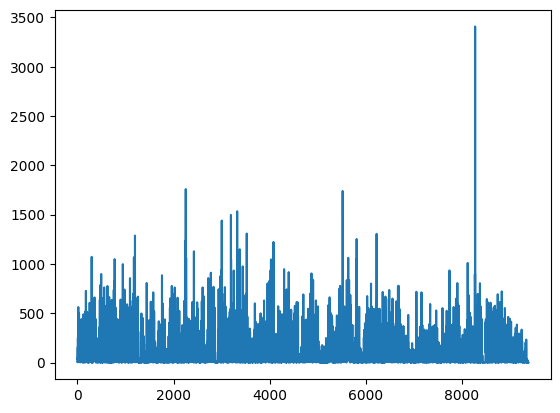

In [129]:
plt.plot(Lens)

In [1]:
import torch

il = [1, 2, 3, 4]
x = torch.tensor(il, dtype = torch.float32)

print(x[0])

tensor(1.)


# POC

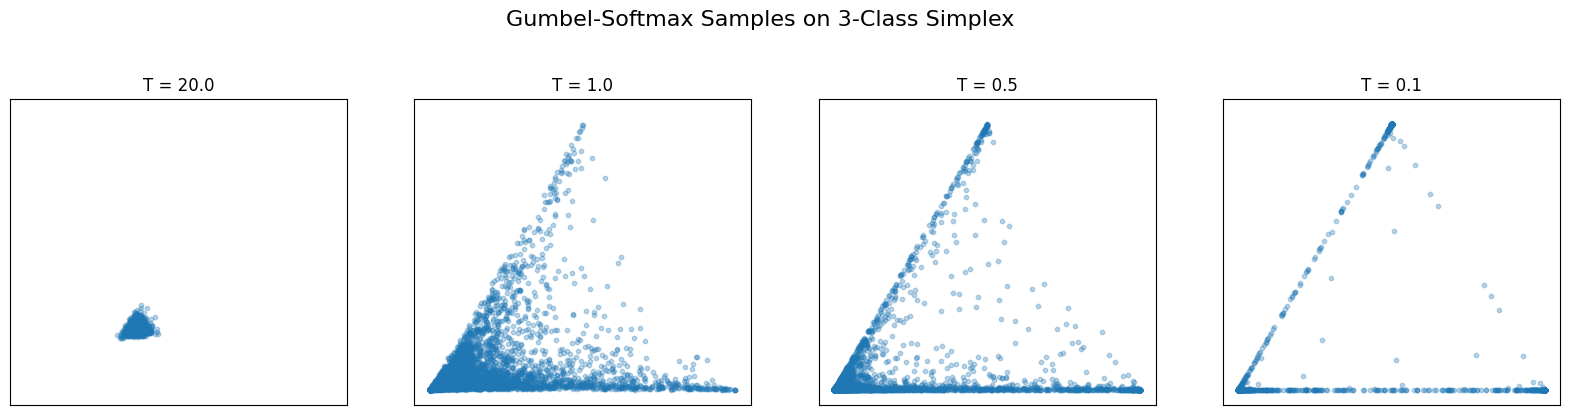

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Functions -----
def gumbel_softmax_sample(logits, tau=1.0, n_samples=1000):
    """Draw samples from Gumbel-Softmax"""
    K = len(logits)
    gumbel = -np.log(-np.log(np.random.rand(n_samples, K)))
    y = (logits + gumbel) / tau
    y = np.exp(y) / np.sum(np.exp(y), axis=1, keepdims=True)
    return y

def plot_simplex(ax, samples, title=""):
    """
    Convert 3-class probabilities to 2D simplex coordinates for plotting.
    Uses barycentric coordinates.
    """
    # Barycentric to 2D conversion
    x = samples[:, 1] + 0.5 * samples[:, 2]
    y = (np.sqrt(3)/2) * samples[:, 2]
    ax.scatter(x, y, alpha=0.3, s=10)
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 0.95)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)

# ----- Main -----
rng = np.random.default_rng(42)
logits = np.array([2.0, 1.0, 0.1, 3.0])  # biased categorical
taus = [20.0, 1.0, 0.5, 0.1]

fig, axes = plt.subplots(1, len(taus), figsize=(20,5))

for ax, tau in zip(axes, taus):
    samples = gumbel_softmax_sample(logits, tau, n_samples=5000)
    plot_simplex(ax, samples, title=f"T = {tau}")

plt.suptitle("Gumbel-Softmax Samples on 3-Class Simplex", fontsize=16)
plt.show()


# CSV Files Filtering Again

In [1]:
import os
import shutil

for dirs in os.listdir("/home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs"):
    dir_path = os.path.join("/home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs", dirs)
    if not os.path.isdir(dir_path):
        continue

    img_dir = os.path.join(
        dir_path, "trajectory_report_data", "images"
    )
    if not os.path.isdir(img_dir):
        continue

    try:
        shutil.rmtree(img_dir)
        print(f"Removed directory: {img_dir}")
    except Exception as e:
        print(f"Error removing {img_dir}: {e}")


Removed directory: /home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs/SW10-28-29-30/trajectory_report_data/images
Removed directory: /home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs/SW35-103-04-105/trajectory_report_data/images
Removed directory: /home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs/SW36-106-107-108/trajectory_report_data/images
Removed directory: /home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs/SW05-13-14-15/trajectory_report_data/images
Removed directory: /home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs/SW31-91-92-93/trajectory_report_data/images
Removed directory: /home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs/SW04-10-11-12/trajectory_report_data/images
Removed directory: /home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs/SW23-67-68-69/trajectory_report_data/images
Removed directory: /home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs/SW32-94-95-96/trajectory_report_data/images
Removed dir

# Stateful LSTM

In [3]:
import torch
import torch.nn as nn

# Custom Dataset
class TensorDataset(torch.utils.data.Dataset):
    def __init__(self, TensorX,TensorY):
        self.TensorX = TensorX
        self.TensorY = TensorY
    def __len__(self):
        return self.TensorX.shape[0]
    def __getitem__(self,idx):
        return (self.TensorX[idx],self.TensorY[idx])

# Model = Stateful LSTM+linear
class LSTM(nn.Module):
    def __init__(self, input_size,hidden_size,output_size):
        super(LSTM, self).__init__()
        self.lstm = torch.nn.LSTM(batch_first=True,input_size=input_size,hidden_size=hidden_size)
        self.linear = torch.nn.Linear(in_features=hidden_size, out_features=output_size)
    def forward(self, x, hn, cn):
        # Stateful
        x_longer = x.view(1,x.shape[0]*x.shape[1],x.shape[2])
        out_longer, (hn, cn) = self.lstm(x_longer, (hn.detach(), cn.detach()))
        out = out_longer.view(x.shape[0],x.shape[1],out_longer.shape[2])
        out = self.linear(out[:,-1,:])
        return out.unsqueeze(-1), (hn, cn)

N_epochs = 10000
hidden_size = 2
features = 1
learning_rate = 0.001
batch_size=2
output_size = 1
model = LSTM(input_size=features,hidden_size=hidden_size,output_size=output_size)#Create model
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)#optimizer
criterion = torch.nn.MSELoss() # loss
# Create dataset: Imagine original_batch_size=2
x = torch.tensor([[1.0, 2.0, 3.0],[4.0, 5.0, 6.0],[7.0, 8.0, 9.0],[10.0, 11.0, 12.0]]).unsqueeze(-1)
y = torch.tensor([[4.],[7.],[10.],[13.]]).unsqueeze(-1)
dataset = TensorDataset(x,y)
dataloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size)
# Training
for epoch in range(0,N_epochs):
    # Create first hidden and cell state with batch=1 
    hn = torch.zeros(1, 1, hidden_size)#[num_layers*num_directions,batch,hidden_size]
    cn = torch.zeros(1, 1, hidden_size)#[num_layers*num_directions,batch,hidden_size]
    for x,y in dataloader:
        optimizer.zero_grad()
        out, (hn,cn) = model(x,hn,cn)
        loss = criterion(out,y)
        loss.backward()# Backward
        optimizer.step()# gradient descent on adam step

# Bad Trajectory Check

In [2]:
def filter_csv(df):
    if df.empty:
        return False, False

    # Condition 1: All values within ±50 (for x, y, z)
    within_50 = (
        df[["x", "y", "z"]].apply(lambda col: col.between(-50, 50).all()).any()
    )

    # Condition 2: Any value outside ±5000 (for z)
    outside_3000 = (~df["z"].between(-3000, 3000)).any()

    # return bool(within_50), bool(outside_5000), bool(sudden_change)
    return bool(within_50), bool(outside_3000)


def gps_to_ned(df, check=False):
    valid_rows = df[
        (df["GPS Lat"] != 0) & (df["GPS Lon"] != 0) & (df["Altitude"] != 0)
    ]
    if valid_rows.empty:
        return pd.DataFrame(columns=["x", "y", "z"])

    df = df[valid_rows.index[0] :].reset_index()

    lat_ref, lon_ref, alt_ref = df[["GPS Lat", "GPS Lon", "Altitude"]].iloc[0]

    ned_coords = [
        pm.geodetic2ned(
            row["GPS Lat"],
            row["GPS Lon"],
            row["Altitude"],
            lat_ref,
            lon_ref,
            alt_ref,
        )
        for _, row in df.iterrows()
    ]

    ned_df = pd.DataFrame(
        [(n, e, -d) for n, e, d in ned_coords], columns=["x", "y", "z"]
    )

    if check:
        ned_df["group"] = df["group"]
        ned_df["Mode"] = df["Mode"]

    return ned_df

In [10]:
def process_directory(dir_path, image_dir):
    good_trajectory_path = os.path.join(image_dir, "good_trajectories")
    bad_trajectory_path = os.path.join(image_dir, "bad_trajectories")

    for file in os.listdir(bad_trajectory_path):
        if not file.endswith(".png"):
            continue

        flight_csv_path = os.path.join(dir_path, file.replace(".png", ".csv"))

        try:
            df = pd.read_csv(flight_csv_path, on_bad_lines="skip", low_memory=False)
        except Exception as e:
            print(f"Failed to read {flight_csv_path}: {e}")
            continue

        df_ned = gps_to_ned(df)
        within_50, outside_3000 = filter_csv(df_ned)

        if not within_50 and not outside_3000:
            msg = f"Moving Trajectory: {bad_trajectory_path}"
            print(msg)
            bad_trajectory = os.path.join(bad_trajectory_path, file)
            print(bad_trajectory)
            shutil.move(bad_trajectory, good_trajectory_path)

In [12]:
import os 
import pandas as pd
import pymap3d as pm
import shutil
csv_files_dir = "/home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs"
for dir in os.listdir(csv_files_dir):
    dir_path = os.path.join(csv_files_dir, dir)
    if not os.path.isdir(dir_path):
        continue

    img_dir = os.path.join(
        dir_path, "trajectory_report_data", "images"
    )
    if not os.path.isdir(img_dir):
        continue

    process_directory(dir_path, img_dir)

Moving Trajectory: /home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs/SW35-103-04-105/trajectory_report_data/images/bad_trajectories
/home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs/SW35-103-04-105/trajectory_report_data/images/bad_trajectories/30 April 2022 12_02_11.png
Moving Trajectory: /home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs/SW35-103-04-105/trajectory_report_data/images/bad_trajectories
/home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs/SW35-103-04-105/trajectory_report_data/images/bad_trajectories/01 May 2022 08_15_18.png
Moving Trajectory: /home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs/SW35-103-04-105/trajectory_report_data/images/bad_trajectories
/home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs/SW35-103-04-105/trajectory_report_data/images/bad_trajectories/01 May 2022 17_45_09.png
Moving Trajectory: /home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/csvs/SW36-106-107-108/trajectory_report_data/images/ba

# Stateful LSTM

In [2]:
import torch.nn as nn
import torch

class LSTMModelV3(nn.Module):
    def __init__(
        self, in_dim=10, hidden_size=500, num_layers=1, output_size=3, dropout_prob=0.1
    ):
        super(LSTMModelV3, self).__init__()
        # Initialize hidden and cell states
        # self.h0 = torch.zeros(num_layers, batch_size, hidden_size).to(device)
        # self.c0 = torch.zeros(num_layers, batch_size, hidden_size).to(device)

        self.name = "LSTMModelV3"
        self.lstm_1 = nn.LSTM(
            in_dim, hidden_size, num_layers, batch_first=True
        )  # , return_sequences=True)
        # self.dropout_1 = nn.Dropout(dropout_prob)
        self.lstm_2 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        # self.dropout_2 = nn.Dropout(dropout_prob)
        self.lstm_3 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        # self.dropout_3 = nn.Dropout(dropout_prob)
        self.lstm_4 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        # self.dropout_4 = nn.Dropout(dropout_prob)
        # self.lstm_5 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        # self.dropout_5 = nn.Dropout(dropout_prob)
        # self.lstm_6 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x, _ = self.lstm_1(x)
        # x = self.dropout_1(x)
        x, _ = self.lstm_2(x)
        # x = self.dropout_2(x)
        x, _ = self.lstm_3(x)
        # x = self.dropout_3(x)
        x, _ = self.lstm_4(x)
        output = self.fc(x[:, -1, :])
        return output
    
model = LSTMModelV3(in_dim=11, hidden_size=1400, output_size=2)  #  dropout_prob=0.3
checkpoint_path = "/home/arjav.singh/Projects/DeepIO/Production_Data/SIDM/training_results/GPU Train 14-20250929-124430/checkpoints/best_model.pt"
checkpoint = torch.load(
    checkpoint_path,
    map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
)
model.load_state_dict(checkpoint["model_state_dict"])

<All keys matched successfully>

In [3]:
class StatefulLSTMModelV3(nn.Module):
    def __init__(
        self,
        in_dim=10,
        hidden_size=500,
        num_layers=1,
        output_size=3,
        dropout_prob=0.1,
        device="cpu",
    ):
        super(StatefulLSTMModelV3, self).__init__()
        self.name = "StatefulLSTMModelV3"
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.device = device

        # Define stacked LSTMs
        self.lstm_1 = nn.LSTM(in_dim, hidden_size, num_layers, batch_first=True)
        self.lstm_2 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.lstm_3 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.lstm_4 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

        # Initialize hidden states for each LSTM
        self.hidden_states = [None] * 4  # ! number of LSTM layers

    def reset_states(self, batch_size):
        """Reset all LSTM hidden and cell states"""
        self.hidden_states = [
            (
                torch.zeros(self.num_layers, batch_size, self.hidden_size).to(
                    self.device
                ),
                torch.zeros(self.num_layers, batch_size, self.hidden_size).to(
                    self.device
                ),
            )
            for _ in range(4)  # ! number of LSTM layers
        ]

    def forward(self, x):
        batch_size = x.size(0)

        # Initialize states if None
        if self.hidden_states[0] is None:
            self.reset_states(batch_size)

        # Pass through each LSTM layer with its own state
        x, self.hidden_states[0] = self.lstm_1(x, self.hidden_states[0])
        x, self.hidden_states[1] = self.lstm_2(x, self.hidden_states[1])
        x, self.hidden_states[2] = self.lstm_3(x, self.hidden_states[2])
        x, self.hidden_states[3] = self.lstm_4(x, self.hidden_states[3])

        output = self.fc(x[:, -1, :])
        return output

    def detach_states(self):
        """Detach hidden states to prevent backprop through history"""
        self.hidden_states = [(h.detach(), c.detach()) for (h, c) in self.hidden_states]
        
stateful_model = StatefulLSTMModelV3(
    in_dim=model.lstm_1.input_size,
    hidden_size=model.lstm_1.hidden_size,
    num_layers=model.lstm_1.num_layers,
    output_size=model.fc.out_features,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

stateful_model.load_state_dict(model.state_dict())


<All keys matched successfully>

In [4]:
# 4. Verify outputs on single batch
x = torch.randn(16, 20, 11)
with torch.no_grad():
    y_stateless = model(x)
    y_stateful = stateful_model(x)
print(torch.allclose(y_stateless, y_stateful, atol=1e-6))
# ✅ Should print True

True


In [ ]:
class SwitchableLSTMModelV3(nn.Module):
    def __init__(
        self,
        in_dim=10,
        hidden_size=500,
        num_layers=1,
        output_size=3,
        dropout_prob=0.1,
        device="cpu",
    ):
        super(SwitchableLSTMModelV3, self).__init__()
        self.name = "SwitchableLSTMModelV3"
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.device = device
        self.stateful = False  # default: stateless mode

        # Define stacked LSTMs
        self.lstm_1 = nn.LSTM(in_dim, hidden_size, num_layers, batch_first=True)
        self.lstm_2 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.lstm_3 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.lstm_4 = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

        # Hidden states (only used in stateful mode)
        self.hidden_states = [None] * 4  # number of LSTM layers

    def set_stateful(self, mode: bool):
        """Enable or disable stateful mode."""
        self.stateful = mode
        if not mode:
            # If switching to stateless, clear states
            self.hidden_states = [None] * 4

    def reset_states(self, batch_size):
        """Reset all hidden and cell states (for stateful mode)"""
        self.hidden_states = [
            (
                torch.zeros(self.num_layers, batch_size, self.hidden_size).to(
                    self.device
                ),
                torch.zeros(self.num_layers, batch_size, self.hidden_size).to(
                    self.device
                ),
            )
            for _ in range(4)
        ]

    def detach_states(self):
        """Detach hidden states to prevent backprop through history"""
        if self.stateful:
            self.hidden_states = [
                (h.detach(), c.detach()) for (h, c) in self.hidden_states
            ]
            
    def forward(self, x):
        batch_size = x.size(0)

        # Stateless mode: always reset hidden states
        if not self.stateful:
            hidden_states = [
                (
                    torch.zeros(self.num_layers, batch_size, self.hidden_size).to(
                        self.device
                    ),
                    torch.zeros(self.num_layers, batch_size, self.hidden_size).to(
                        self.device
                    ),
                )
                for _ in range(4)
            ]
        else:
            # Stateful mode: initialize if first batch
            if self.hidden_states[0] is None:
                self.reset_states(batch_size)
            hidden_states = self.hidden_states

        # Sequentially pass through LSTM layers
        x, hidden_states[0] = self.lstm_1(x, hidden_states[0])
        x, hidden_states[1] = self.lstm_2(x, hidden_states[1])
        x, hidden_states[2] = self.lstm_3(x, hidden_states[2])
        x, hidden_states[3] = self.lstm_4(x, hidden_states[3])

        # Store updated states if stateful
        if self.stateful:
            self.hidden_states = hidden_states

        output = self.fc(x[:, -1, :])
        return output


class LSTMStateConverter:
    """
    Converts a trained stateless LSTM model into a stateful one,
    preserving all learned weights and configurations.
    """

    @staticmethod
    def convert_to_stateful(stateless_model, device="cpu", stateful_mode=True):
        """
        Convert a trained stateless LSTMModelV3 to a SwitchableLSTMModelV3.

        Args:
            stateless_model (nn.Module): Trained stateless LSTM model.
            device (str): Target device for the new model.
            stateful_mode (bool): Whether to enable stateful mode by default.

        Returns:
            SwitchableLSTMModelV3: A model with identical weights, but with stateful capability.
        """
        # Ensure model type
        if not hasattr(stateless_model, "lstm_1"):
            raise ValueError(
                "Input model does not seem to be an LSTMModelV3-like architecture."
            )

        # Import the class dynamically (assumes it's defined in the same file or namespace)
        model_cls = SwitchableLSTMModelV3

        # Create new model with same hyperparameters
        stateful_model = model_cls(
            in_dim=stateless_model.lstm_1.input_size,
            hidden_size=stateless_model.lstm_1.hidden_size,
            num_layers=stateless_model.lstm_1.num_layers,
            output_size=stateless_model.fc.out_features,
            device=device,
        )

        # Load weights
        stateful_model.load_state_dict(stateless_model.state_dict())

        # Enable stateful mode if required
        stateful_model.set_stateful(stateful_mode)
        stateful_model.to(device)

        return stateful_model



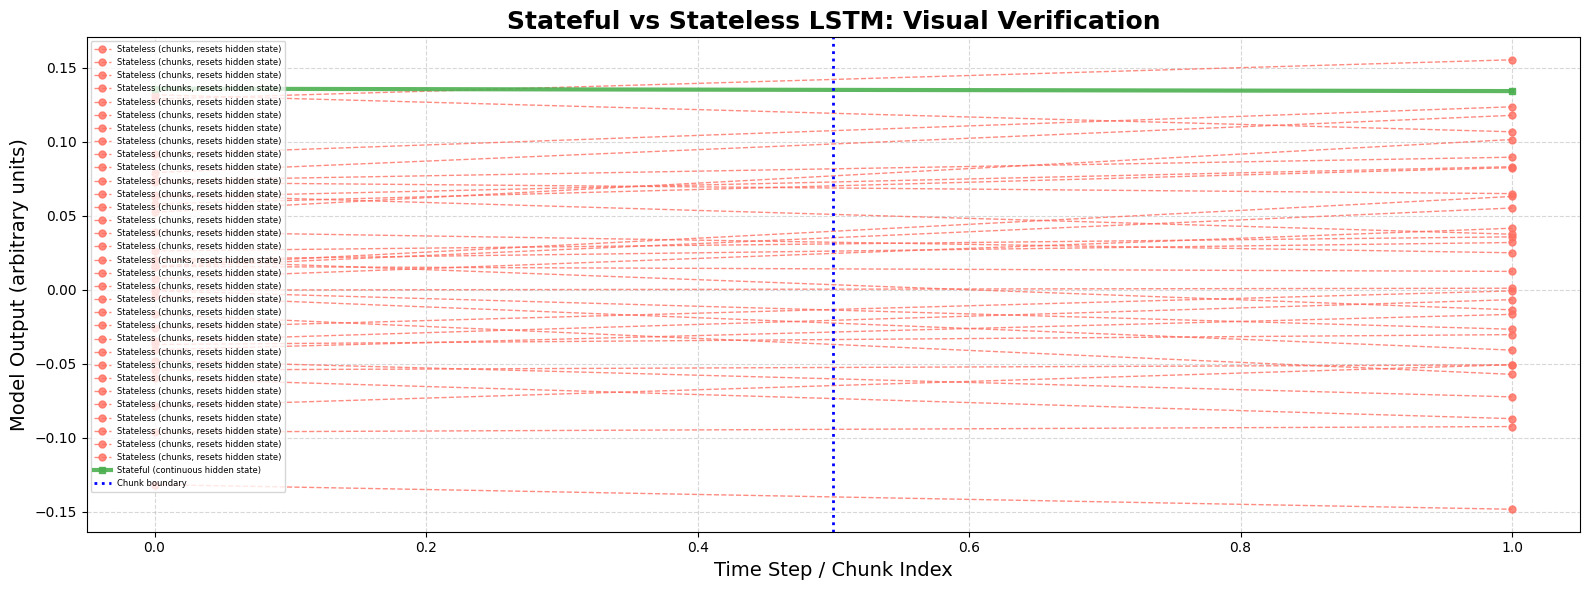

In [10]:
import torch
import matplotlib.pyplot as plt

# 1️⃣ Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create random input sequence (e.g., 1 sample, 100 timesteps, 11 features)
seq_len = 1000
x = torch.sin(torch.linspace(0, 10, seq_len)).unsqueeze(0).unsqueeze(-1)  # (1, 100, 1)
x = x.to(device)

# 2️⃣ Load or create stateless model
stateless_model = LSTMModelV3(in_dim=1, hidden_size=32, output_size=1).to(device)
stateless_model.eval()

# 3️⃣ Convert to stateful
converter = LSTMStateConverter()
stateful_model = converter.convert_to_stateful(stateless_model, device=device, stateful_mode=True)
stateful_model.eval()

# 4️⃣ Test both on same data split into two halves
with torch.no_grad():
    # Full sequence (ground truth)
    full_out_stateless = stateless_model(x)
    full_out_stateful = stateful_model(x)
    
    # Split sequence into two halves (to simulate stateful streaming)
    x1, x2 = x[:, :5, :], x[:, 5:, :]

    # Stateless model runs independently
    y1_stateless, _ = stateless_model.lstm_1(x1)
    y2_stateless, _ = stateless_model.lstm_1(x2)
    stateless_concat = torch.cat([y1_stateless[:, -1, :], y2_stateless[:, -1, :]], dim=0).cpu().numpy()

    # Stateful model remembers states between chunks
    stateful_model.reset_states(batch_size=1)
    y1_stateful = stateful_model(x1)
    # Detach or keep hidden state intentionally (this is key)
    y2_stateful = stateful_model(x2)
    stateful_concat = torch.cat([y1_stateful, y2_stateful], dim=0).cpu().numpy()

# 5️⃣ Plot comparison
# Chunk boundary (assuming first half is chunk 1)
chunk_boundary = len(stateless_concat) // 2

plt.figure(figsize=(16, 6), facecolor='white')

# Plot stateless
plt.plot(
    stateless_concat,
    label="Stateless (chunks, resets hidden state)",
    color="#FF6F61",
    linestyle="--",
    linewidth=1,
    marker='o',
    markersize=5,
    alpha=0.8
)

# Plot stateful
plt.plot(
    stateful_concat,
    label="Stateful (continuous hidden state)",
    color="#4CAF50",
    linestyle="-",
    linewidth=3,
    marker='s',
    markersize=5,
    alpha=0.9
)

# Highlight chunk boundary
plt.axvline(
    x=chunk_boundary - 0.5, 
    color='blue', 
    linestyle=':', 
    linewidth=2, 
    label='Chunk boundary'
)

# Titles and labels
plt.title("Stateful vs Stateless LSTM: Visual Verification", fontsize=18, fontweight='bold')
plt.xlabel("Time Step / Chunk Index", fontsize=14)
plt.ylabel("Model Output (arbitrary units)", fontsize=14)

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=6, loc='upper left')
plt.tight_layout()

plt.show()


## Testing the nested zips

In [ ]:
import zipfile
import os
import shutil

class ZipExtractor:
    def __init__(self):
        pass

    def extract_csv_from_zip(self, zip_path, dest_folder):
        """
        Extracts CSVs from a zip archive (and any nested zip archives) to a destination folder.
        """
        try:
            # Create a temporary directory to extract contents of the current zip file
            temp_extract_folder = os.path.join(dest_folder, "temp_extract_" + os.path.basename(zip_path))
            os.makedirs(temp_extract_folder, exist_ok=True)

            with zipfile.ZipFile(zip_path, "r") as zip_ref:
                print(f"Opening zip: {zip_path}")
                for member in zip_ref.namelist():
                    member_path = os.path.join(temp_extract_folder, member)

                    # Extract the member to the temporary folder
                    zip_ref.extract(member, temp_extract_folder)

                    if member.lower().endswith(".csv"):
                        # If it's a CSV, move it directly to the final destination
                        final_csv_path = os.path.join(dest_folder, os.path.basename(member))
                        if os.path.exists(final_csv_path):
                            print(f"Warning: Overwriting existing CSV: {final_csv_path}")
                        shutil.move(member_path, final_csv_path)
                        print(f"Extracted CSV: {member} → {dest_folder}")
                    elif member.lower().endswith(".zip"):
                        # If it's a nested zip, recursively call the function
                        print(f"Found nested zip: {member}")
                        self.extract_csv_from_zip(member_path, dest_folder)
            
            # Clean up the temporary extraction folder
            shutil.rmtree(temp_extract_folder)

        except (FileNotFoundError, zipfile.BadZipFile) as e:
            print(f"[ZIP ERROR] {zip_path}: {e}")
        except Exception as e:
            print(f"[UNKNOWN ERROR] {zip_path}: {e}")

# Example Usage:
if __name__ == "__main__":
    extractor = ZipExtractor()
    
    # Create some dummy zip files for testing
    # You would replace this with your actual zip files
    
    # Create a dummy CSV
    with open("data.csv", "w") as f:
        f.write("header1,header2\n")
        f.write("value1,value2\n")

    # Create a nested CSV
    with open("nested_data.csv", "w") as f:
        f.write("nested_header,nested_value\n")
        f.write("n1,n2\n")

    # Create inner zip
    with zipfile.ZipFile("inner.zip", "w") as inner_zip:
        inner_zip.write("nested_data.csv")
        inner_zip.write("some_text.txt", arcname="inner_text.txt") # Add a non-csv file

    # Create outer zip with a CSV and the inner zip
    with zipfile.ZipFile("outer.zip", "w") as outer_zip:
        outer_zip.write("data.csv")
        outer_zip.write("inner.zip")
        outer_zip.write("another_file.log")

    os.makedirs("extracted_csvs", exist_ok=True)

    print("--- Starting extraction ---")
    extractor.extract_csv_from_zip("outer.zip", "extracted_csvs")
    print("--- Extraction finished ---")

    # Clean up dummy files
    os.remove("data.csv")
    os.remove("nested_data.csv")
    os.remove("inner.zip")
    os.remove("outer.zip")
    # shutil.rmtree("extracted_csvs") # Uncomment to remove the extracted_csvs folder after testing